In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
import nltk
import warnings 
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB
#from sklearn.xgboost import XGBoost
from sklearn.metrics import accuracy_score
from nltk.stem import PorterStemmer
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
# pip install xgboost

In [3]:
train_data = pd.read_csv("/kaggle/input/covid-19-nlp-text-classification/Corona_NLP_train.csv", encoding = 'latin-1')
test_data = pd.read_csv("/kaggle/input/covid-19-nlp-text-classification/Corona_NLP_test.csv", encoding = 'latin-1')

In [4]:
train_data

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative
...,...,...,...,...,...,...
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral
41153,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative
41154,44953,89905,NaN,14-04-2020,You know itÂs getting tough when @KameronWild...,Positive
41155,44954,89906,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral


In [5]:
test_data

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral
...,...,...,...,...,...,...
3793,3794,48746,Israel ??,16-03-2020,Meanwhile In A Supermarket in Israel -- People...,Positive
3794,3795,48747,"Farmington, NM",16-03-2020,Did you panic buy a lot of non-perishable item...,Negative
3795,3796,48748,"Haverford, PA",16-03-2020,Asst Prof of Economics @cconces was on @NBCPhi...,Neutral
3796,3797,48749,NaN,16-03-2020,Gov need to do somethings instead of biar je r...,Extremely Negative


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [7]:
train_data.shape

(41157, 6)

In [8]:
train_data.OriginalTweet[3]

"My food stock is not the only one which is empty...\r\r\n\r\r\nPLEASE, don't panic, THERE WILL BE ENOUGH FOOD FOR EVERYONE if you do not take more than you need. \r\r\nStay calm, stay safe.\r\r\n\r\r\n#COVID19france #COVID_19 #COVID19 #coronavirus #confinement #Confinementotal #ConfinementGeneral https://t.co/zrlG0Z520j"

In [9]:
train = train_data[["OriginalTweet", "Sentiment"]]
train.head()

,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,advice Talk to your neighbours family to excha...,Positive
2,Coronavirus Australia: Woolworths to give elde...,Positive
3,My food stock is not the only one which is emp...,Positive
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [10]:
train['OriginalTweet'] = train['OriginalTweet'].str.lower()

In [11]:
train.OriginalTweet[3]

"my food stock is not the only one which is empty...\r\r\n\r\r\nplease, don't panic, there will be enough food for everyone if you do not take more than you need. \r\r\nstay calm, stay safe.\r\r\n\r\r\n#covid19france #covid_19 #covid19 #coronavirus #confinement #confinementotal #confinementgeneral https://t.co/zrlg0z520j"

In [12]:
train['OriginalTweet'] = train['OriginalTweet'].str.replace('[^\w\s]', '')

In [13]:
train.OriginalTweet[3]

'my food stock is not the only one which is empty\r\r\n\r\r\nplease dont panic there will be enough food for everyone if you do not take more than you need \r\r\nstay calm stay safe\r\r\n\r\r\ncovid19france covid_19 covid19 coronavirus confinement confinementotal confinementgeneral httpstcozrlg0z520j'

In [14]:
train['OriginalTweet'] = train['OriginalTweet'].str.replace('\n', '')

In [15]:
train.OriginalTweet[3]

'my food stock is not the only one which is empty\r\r\r\rplease dont panic there will be enough food for everyone if you do not take more than you need \r\rstay calm stay safe\r\r\r\rcovid19france covid_19 covid19 coronavirus confinement confinementotal confinementgeneral httpstcozrlg0z520j'

In [16]:
train['OriginalTweet'] = train['OriginalTweet'].str.replace('\r', '')

In [17]:
train.OriginalTweet[3]

'my food stock is not the only one which is emptyplease dont panic there will be enough food for everyone if you do not take more than you need stay calm stay safecovid19france covid_19 covid19 coronavirus confinement confinementotal confinementgeneral httpstcozrlg0z520j'

In [18]:
train['OriginalTweet'] = train['OriginalTweet'].str.replace('\d+', '')

In [19]:
train.OriginalTweet[3]

'my food stock is not the only one which is emptyplease dont panic there will be enough food for everyone if you do not take more than you need stay calm stay safecovidfrance covid_ covid coronavirus confinement confinementotal confinementgeneral httpstcozrlgzj'

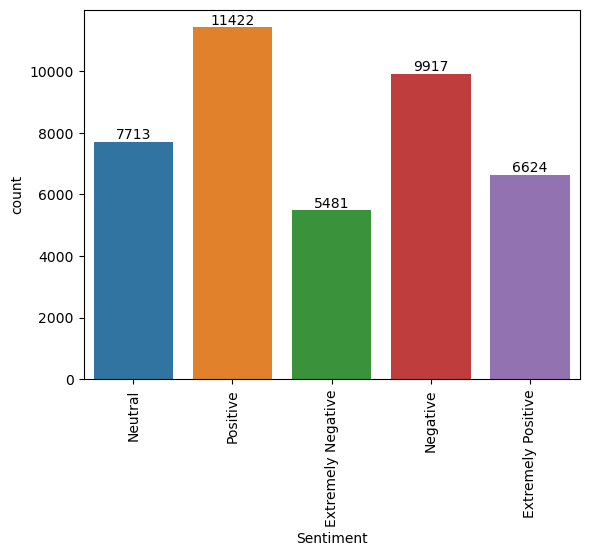

In [20]:
ax = sbn.countplot(x = train['Sentiment'])
ax.bar_label(ax.containers[0])
plt.xticks(rotation = 90);

In [21]:
## Sentiment Analysis

In [22]:
train['Sentiment'].value_counts()

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64

In [23]:
train['Sentiment'] = train['Sentiment'].replace({'Extremely Negative' : 0, 'Negative' : 1,
                                                'Neutral' : 2, 'Positive' : 3, 'Extremely Positive' : 4})

In [24]:
train.head()

,OriginalTweet,Sentiment
0,menyrbie phil_gahan chrisitv httpstcoifzfanpa ...,2
1,advice talk to your neighbours family to excha...,3
2,coronavirus australia woolworths to give elder...,3
3,my food stock is not the only one which is emp...,3
4,me ready to go at supermarket during the covid...,0


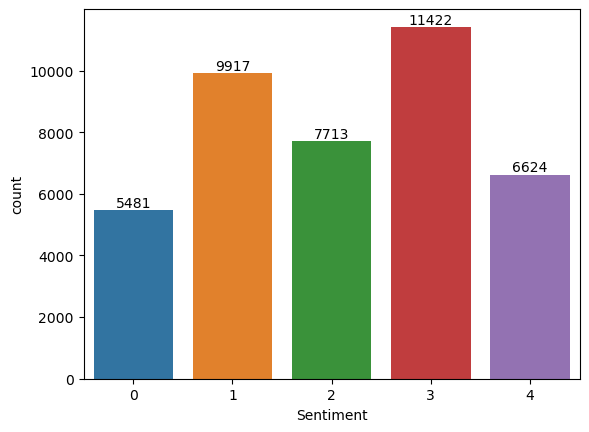

In [25]:
ax = sbn.countplot(x = train['Sentiment'])
ax.bar_label(ax.containers[0]);

In [26]:
pr = PorterStemmer()

In [27]:
def lemma(text):
    words = TextBlob(text).words
    return [pr.stem(word) for word in words]

In [52]:
vect = CountVectorizer(stop_words = "english", ngram_range = (1, 2), max_features = 10000, analyzer = lemma)

In [53]:
x = train['OriginalTweet']
y = train['Sentiment']

In [54]:
x = vect.fit_transform(x)

In [55]:
def classification(x, y):
    dt = DecisionTreeClassifier()
    #ab = AdaBoostClassifier()
    #gb = GradientBoostingClassifier()
    #rf = RandomForestClassifier()
    #kn = KNeighborsClassifier()
    b = BernoulliNB()
    g = GaussianNB()
    m = MultinomialNB()
    
    #models = [dt, ab, gb, b, g, m]
    models = [dt, b, g, m]
    
    #model_names = ['Decision_Tree', 'AdaBoost', 'GradientBoost', 'Bernoulli', 'Gaussian', 'multinomial']
    model_names = ['Decision_Tree','Bernoulli', 'Gaussian', 'multinomial']
    x_train, x_test, y_train, y_true = train_test_split(x.toarray(), y, test_size = 0.2, random_state = 42) 
    acc = []
    sonuc_df = pd.DataFrame(columns = ['Accuracy'], index = model_names)
    
    for model in models:
        model.fit(x_train, y_train)
        tahmin = model.predict(x_test)
        acc.append(accuracy_score(y_true, tahmin) * 100)
        
    sonuc_df['Accuracy'] = acc
    
    return sonuc_df.sort_values('Accuracy', ascending = False)

In [56]:
classification(x, y)

,Accuracy
multinomial,48.530126
Bernoulli,46.610787
Decision_Tree,44.727891
Gaussian,22.448980


In [57]:
## DL
model = Sequential()
model.add(Dense(units = 1000, activation = 'relu'))
model.add(Dense(units = 124, activation = 'relu'))
model.add(Dense(units = 512, activation = 'relu'))
model.add(Dense(units = 64, activation = 'relu'))
model.add(Dense(units = 32, activation = 'relu'))
model.add(Dense(units = 8, activation = 'relu'))
model.add(Dense(units = 1))
model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = 'accuracy')

In [58]:
x_train, x_test, y_train, y_true = train_test_split(x.toarray(), y, test_size = 0.2, random_state = 42) 

In [59]:
history = model.fit(x_train, y_train, epochs = 10, validation_data = (x_test, y_true), batch_size = 32, verbose = 1)

Epoch 1/10
1029/1029 [==============================] - 115s 110ms/step - loss: -16.5304 - accuracy: 0.2399 - val_loss: -16.7849 - val_accuracy: 0.2437
Epoch 2/10
1029/1029 [==============================] - 113s 110ms/step - loss: -16.6210 - accuracy: 0.2403 - val_loss: -16.7849 - val_accuracy: 0.2437
Epoch 3/10
1029/1029 [==============================] - 113s 110ms/step - loss: -16.6211 - accuracy: 0.2403 - val_loss: -16.7849 - val_accuracy: 0.2437
Epoch 4/10
1029/1029 [==============================] - 112s 109ms/step - loss: -16.6210 - accuracy: 0.2403 - val_loss: -16.7849 - val_accuracy: 0.2437
Epoch 5/10
1029/1029 [==============================] - 113s 110ms/step - loss: -16.6210 - accuracy: 0.2403 - val_loss: -16.7849 - val_accuracy: 0.2437
Epoch 6/10
1029/1029 [==============================] - 114s 111ms/step - loss: -16.6211 - accuracy: 0.2403 - val_loss: -16.7849 - val_accuracy: 0.2437
Epoch 7/10
1029/1029 [==============================] - 116s 113ms/step - loss: -16.6210

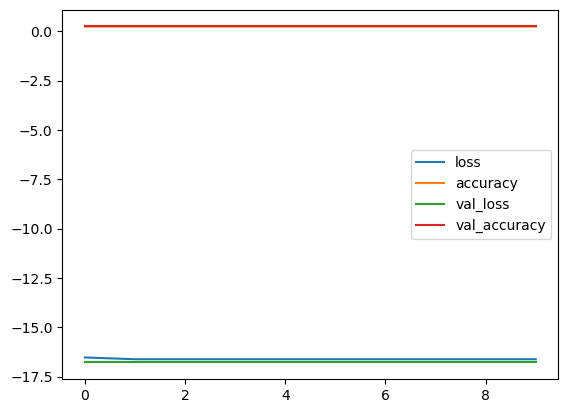

In [61]:
loss = pd.DataFrame(history.history)
loss.plot();